In [6]:
import pandas as pd

# Leer la base de datos
df = pd.read_excel('/Users/macbook/Desktop/UdeSa/Materias/Big data/Big-Data/TP2/EPH_usu_1er_Trim_2023/usu_individual_T123.xlsx')

# Filtrar observaciones
df_filtrado = df[df['AGLOMERADO'].isin([32, 33])]

In [7]:
# 3. Limpiar las observaciones
df_limpiado = df_filtrado[(df_filtrado['CH06'] >= 0)]
# Eliminamos las edades negativas

df_limpio = df_limpiado[
    (df_limpiado['ESTADO'] != 0) & # 0 = Entrevista individual no realizada (no respuesta al cuestionario individual)
    (df_limpiado['NIVEL_ED'] != 9) & # 9 = Ns/Nr 
    (df_limpiado['CH08'] != 9) & # 9 = Ns/Nr
    (df_limpiado['CH07'] != 9) # 9 = Ns/Nr 
    #(df_limpiado['CAT_INAC'] != 0) # Casos que no les corresponde la inactividad, no los sacamos para mantener los activos
]

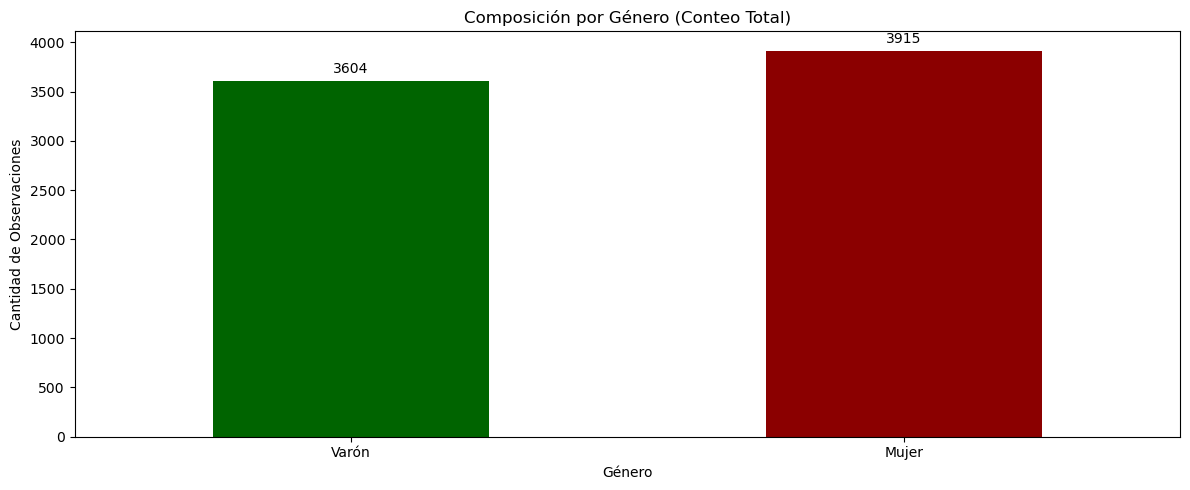

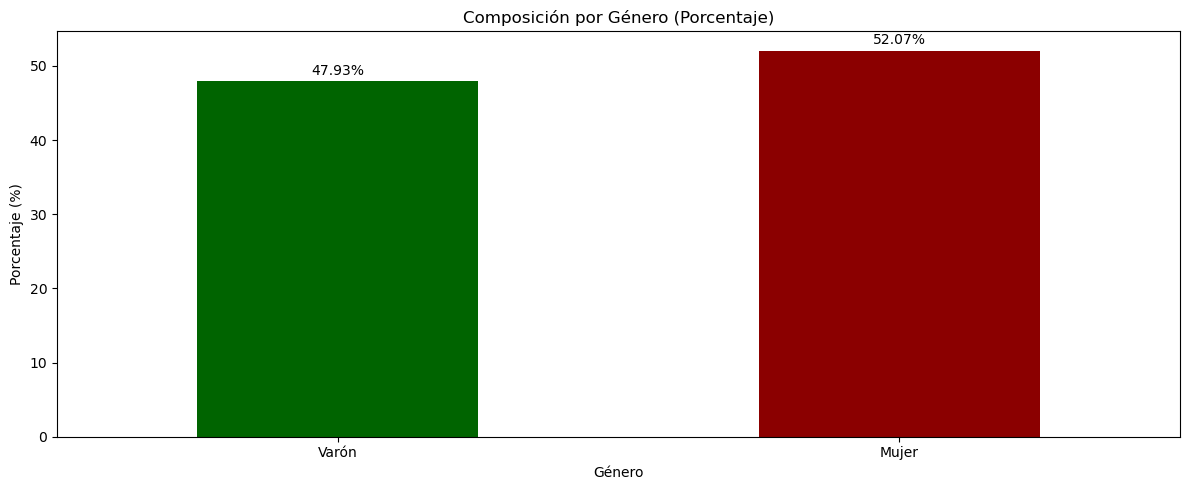

In [8]:
import matplotlib.pyplot as plt

# Conteo total por género
gender_counts = df_limpio['CH04'].value_counts()

# Porcentajes por género
gender_percentage = (df_limpio['CH04'].value_counts(normalize=True) * 100)

# Gráfico de barras con conteo total y etiquetas 
plt.figure(figsize=(12, 5))
bars = gender_counts.sort_index().plot(kind='bar', color=['darkgreen', 'darkred'])
plt.title('Composición por Género (Conteo Total)')
plt.xlabel('Género')
plt.ylabel('Cantidad de Observaciones')
plt.xticks(ticks=[0, 1], labels=['Varón', 'Mujer'], rotation=0)

# Agregar etiquetas a las barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha="center", va="bottom")

plt.tight_layout()
plt.show()

# Gráfico de barras con porcentajes y etiquetas 
plt.figure(figsize=(12, 5))
bars_percentage = gender_percentage.sort_index().plot(kind='bar', color=['darkgreen', 'darkred'])
plt.title('Composición por Género (Porcentaje)')
plt.xlabel('Género')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=[0, 1], labels=['Varón', 'Mujer'], rotation=0)

# Agregar etiquetas a las barras
for bar in bars_percentage.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{round(yval, 2)}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


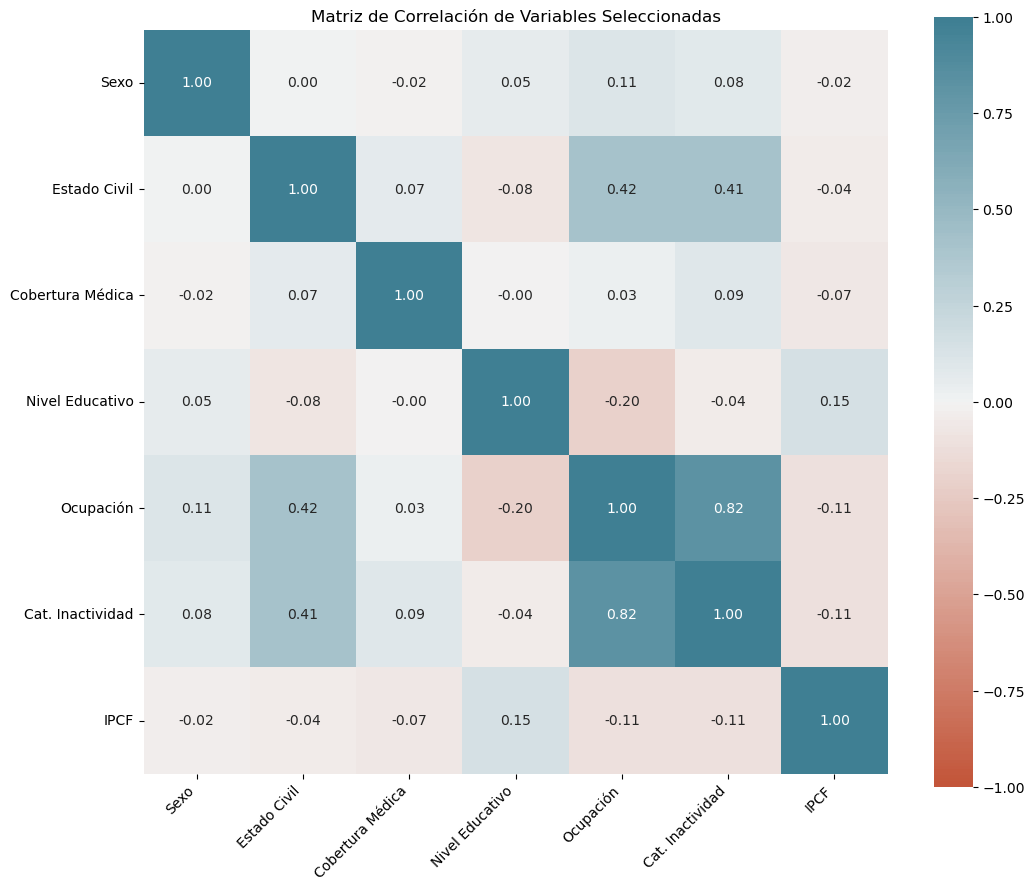

In [9]:
# 2.d, Seleccionamos solo las columnas de interés

# Matriz de correlación
import seaborn as sns

seleccion_variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
etiquetas = ['Sexo', 'Estado Civil', 'Cobertura Médica', 'Nivel Educativo', 'Ocupación', 'Cat. Inactividad', 'IPCF']

df_matriz = df_limpio[seleccion_variables]

# Calculamos la matriz de correlación para estas columnas
corr_corrected = df_matriz.corr()

# Creamos el heatmap (mapa de calor) con seaborn
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    corr_corrected, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    xticklabels=etiquetas,  # Agrega las etiquetas al eje x
    yticklabels=etiquetas   # Agrega las etiquetas al eje y
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()


In [10]:
desocupados = len(df_limpio[(df_limpio["ESTADO"]==2)])
print(str(desocupados) + " desocupados")

inactivos = len(df_limpio[(df_limpio["ESTADO"]==3)])
print(str(inactivos) + " inactivos")


# Filtrado basado en el estado laboral
grupo_desocupados = df_limpio.query('ESTADO == 2')
grupo_inactivos = df_limpio.query('ESTADO == 3')
grupo_ocupados = df_limpio.query('ESTADO == 1')

# Cálculo de ingresos per cápita familiar según el estado laboral
promedio_ipcf_ocupados = grupo_ocupados['IPCF'].mean()
promedio_ipcf_desocupados = grupo_desocupados['IPCF'].mean()
promedio_ipcf_inactivos = grupo_inactivos['IPCF'].mean()

# Muestra de resultados

print(f'Ingreso Promedio Per Cápita Familiar (ocupados): ${promedio_ipcf_ocupados:.2f}')
print(f'Ingreso Promedio Per Cápita Familiar (desocupados): ${promedio_ipcf_desocupados:.2f}')
print(f'Ingreso Promedio Per Cápita Familiar (inactivos): ${promedio_ipcf_inactivos:.2f}')

286 desocupados
2826 inactivos
Ingreso Promedio Per Cápita Familiar (ocupados): $59812.34
Ingreso Promedio Per Cápita Familiar (desocupados): $25536.02
Ingreso Promedio Per Cápita Familiar (inactivos): $40089.14


In [11]:
adultos_data = pd.read_excel("tabla_adulto_equiv.xlsx", skiprows=3)
adultos_data = adultos_data.dropna(how='all')
adultos_data = adultos_data.iloc[:23, :]

adultos_data

,Edad,Mujeres,Varones
1,Menor de 1 año,0.35,0.35
2,1año,0.37,0.37
3,2 años,0.46,0.46
4,3 años,0.51,0.51
5,4 años,0.55,0.55
6,5 años,0.60,0.60
7,6 años,0.64,0.64
8,7 años,0.66,0.66
9,8 años,0.68,0.68
10,9 años,0.69,0.69


In [12]:
def categorize_age(age):
    if age == 0:
        return "Menor de 1 año"
    elif age == 1:
        return "1 año"
    elif age == 2:
        return "2 años"
    elif age == 3:
        return "3 años"
    elif age == 4:
        return "4 años"
    elif age == 5:
        return "5 años"
    elif age == 6:
        return "6 años"
    elif age == 7:
        return "7 años"
    elif age == 8:
        return "8 años"
    elif age == 9:
        return "9 años"
    elif age == 10:
        return "10 años"
    elif age == 11:
        return "11 años"
    elif age == 12:
        return "12 años"
    elif age == 13:
        return "13 años"
    elif age == 14:
        return "14 años"
    elif age == 15:
        return "15 años"
    elif age == 16:
        return "16 años"
    elif age == 17:
        return "17 años"
    elif 18 <= age <= 29:
        return "18 a 29 años"
    elif 30 <= age <= 45:
        return "30 a 45 años"
    elif 46 <= age <= 60:
        return "46 a 60 años"
    elif 61 <= age <= 75:
        return "61 a 75 años"
    else:
        return "más de 75 años"

# Creando la columna "Rango de Edad"
df_limpio['Rango de Edad'] = df_limpio['CH06'].apply(categorize_age)

# Mostramos las primeras filas del DataFrame con la columna añadida
df_limpio[['CH06', 'Rango de Edad']].head() 

/var/folders/j3/15rfn6h95lx03hnyzxq38lk80000gn/T/ipykernel_44255/3342445229.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Rango de Edad'] = df_limpio['CH06'].apply(categorize_age)


,CH06,Rango de Edad
102,65,61 a 75 años
103,70,61 a 75 años
104,36,30 a 45 años
105,28,18 a 29 años
106,9,9 años


In [13]:
# Creando dos dataframes: uno para Mujeres y otro para Varones
df_mujeres = adultos_data[['Edad', 'Mujeres']].copy()
df_mujeres['CH04'] = 2
df_mujeres.rename(columns={'Mujeres': 'adulto_equiv'}, inplace=True)

df_varones = adultos_data[['Edad', 'Varones']].copy()
df_varones['CH04'] = 1
df_varones.rename(columns={'Varones': 'adulto_equiv'}, inplace=True)

# Concatenando ambos dataframes
adultos_equiv_data = pd.concat([df_mujeres, df_varones], axis=0)

# Reordenando las columnas y ordenando el dataframe por Edad
adultos_equiv_data = adultos_equiv_data[['Edad', 'CH04', 'adulto_equiv']]
adultos_equiv_data = adultos_equiv_data.sort_values(by=['Edad', 'CH04']).reset_index(drop=True)

adultos_equiv_data.head(100)


,Edad,CH04,adulto_equiv
0,10 años,1,0.79
1,10 años,2,0.70
2,11 años,1,0.82
3,11 años,2,0.72
4,12 años,1,0.85
5,12 años,2,0.74
6,13 años,1,0.90
7,13 años,2,0.76
8,14 años,1,0.96
9,14 años,2,0.76


In [15]:
# Renombrando la columna "Rango de Edad" a "Edad" en df_limpio
df_limpio.rename(columns={'Rango de Edad': 'Edad'}, inplace=True)

# Uniendo df_limpio con adultos_equiv_data usando las columnas "Edad" y "CH04"
df_merged = pd.merge(df_limpio, adultos_equiv_data[['Edad', 'CH04', 'adulto_equiv']],

                     on=['Edad', 'CH04'], how='left')

# Mostrando las primeras filas de la base resultante
df_merged[['CH04', 'CH06', 'Edad', 'adulto_equiv']].head()

/var/folders/j3/15rfn6h95lx03hnyzxq38lk80000gn/T/ipykernel_44255/2351737728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.rename(columns={'Rango de Edad': 'Edad'}, inplace=True)


,CH04,CH06,Edad,adulto_equiv
0,2,65,61 a 75 años,0.67
1,1,70,61 a 75 años,0.83
2,1,36,30 a 45 años,1.00
3,2,28,18 a 29 años,0.76
4,2,9,9 años,0.69


In [16]:
# Agrupar por NRO_HOGAR y CODUSU y calcular la suma de adultos_equiv para cada combinación
sum_adulto_equiv = df_merged.groupby(['NRO_HOGAR', 'CODUSU'])['adulto_equiv'].sum().reset_index(name='ad_equiv_hogar')

# Fusionar con df_merged para asignar los valores calculados a la columna ad_equiv_hogar
df_merged = pd.merge(df_merged, sum_adulto_equiv, on=['NRO_HOGAR', 'CODUSU'], how='left')

# Mostrar las primeras 10 filas del DataFrame para verificar
df_merged[['NRO_HOGAR', 'CODUSU', 'adulto_equiv', 'ad_equiv_hogar']].head(10)

,NRO_HOGAR,CODUSU,adulto_equiv,ad_equiv_hogar
0,1,TQRMNORUYHLMSMCDEIJAH00719364,0.67,1.50
1,1,TQRMNORUYHLMSMCDEIJAH00719364,0.83,1.50
2,1,TQRMNOSRQHJNSOCDEIJAH00802640,1.00,2.45
3,1,TQRMNOSRQHJNSOCDEIJAH00802640,0.76,2.45
4,1,TQRMNOSRQHJNSOCDEIJAH00802640,0.69,2.45
5,1,TQRMNOSWQHJLQRCDEIJAH00796254,1.00,2.00
6,1,TQRMNOSWQHJLQRCDEIJAH00796254,1.00,2.00
7,1,TQRMNOPYVHLMRLCDEIJAH00719346,1.00,2.78
8,1,TQRMNOPYVHLMRLCDEIJAH00719346,0.76,2.78
9,1,TQRMNOPYVHLMRLCDEIJAH00719346,1.02,2.78


In [17]:
# 3
    
no_respondieron = df_merged[(df_merged['DECIFR'] == 12) | (df_merged['DECIFR'] == 13) & (df_merged['ITF'] == 0)].copy()
respondieron = df_merged[(df_merged['DECIFR'] != 12) & (df_merged['DECIFR'] != 13) & (df_merged['ITF'] != 0)].copy()

print(f'Cantidad de personas que no respondieron ingresos: {len(no_respondieron)}')

print(f'Cantidad de personas que respondieron ingresos: {len(respondieron)}')

Cantidad de personas que no respondieron ingresos: 3315
Cantidad de personas que respondieron ingresos: 4173


In [19]:
# parte 1 ejer 4

# Procedemos con el cálculo
canasta_basica_total = 57371.05

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * canasta_basica_total
no_respondieron['ingreso_necesario'] = no_respondieron['ad_equiv_hogar'] * canasta_basica_total


In [104]:
# parte 1 ejer 5

respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

num_pobres = respondieron['pobre'].sum()

# Calcular el porcentaje de pobres en relación al total
porcentaje_pobres = (num_pobres / len(respondieron)) * 100

print(f'Número de pobres identificados: {num_pobres}')
print(f'Porcentaje de pobres identificados: {porcentaje_pobres:.2f}%')


Número de pobres identificados: 1551
Porcentaje de pobres identificados: 37.17%


# Parte II: Clasificación

In [21]:
# 1) 
# Lista de columnas a eliminar
columnas_eliminar = [
    "PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3",
    "P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO",
    "TOT_P12",
    "P47T", "DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "PONDII",
    "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI",
    "ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR",
    "IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH",
    "adulto_equiv", "ad_equiv_hogar", "ingreso_necesario"
]

# Limpiando los dataframes
clean_respondieron = respondieron.drop(columns=columnas_eliminar)
clean_no_respondieron = no_respondieron.drop(columns=columnas_eliminar)

# Imprimiendo las columnas restantes de cada dataframe
print("Columnas en clean_respondieron:")
print(clean_respondieron.columns)

print("\nColumnas en clean_norespondieron:")
print(clean_no_respondieron.columns)

Columnas en clean_respondieron:
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 'PP11R', 'PP11S', 'PP11T',
       'Edad', 'pobre'],
      dtype='object', length=127)

Columnas en clean_norespondieron:
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 'PP11R', 'PP11S',
       'PP11T', 'Edad'],
      dtype='object', length=126)


In [22]:
# Eliminar las columnas con missing values

clean_no_respondieron = clean_no_respondieron.fillna(0)

clean_respondieron = clean_respondieron.fillna(0)

In [27]:
# 2) 
from sklearn.model_selection import train_test_split

# Seleccionar todas las características observadas, excluyendo la columna "pobre"
X = clean_respondieron.drop(columns=["pobre"])

X = X.select_dtypes(include=["number"])

# Añadir una columna constante al conjunto de características observables
X["constante"] = 1

# Establecer la variable dependiente
Y = clean_respondieron["pobre"]
Y_array = Y.to_numpy()

In [28]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba:
X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba = train_test_split(X, Y_array, test_size=0.3, random_state=201)

# Mostramos la cantidad de observaciones en cada conjunto de datos:
print("Conjunto de entrenamiento:", "X_train =", len(X_entrenamiento), "Y_train =", len(Y_entrenamiento))
print("Conjunto de prueba:", "X_test =", len(X_prueba), "Y_test =", len(Y_prueba))

Conjunto de entrenamiento: X_train = 2921 Y_train = 2921
Conjunto de prueba: X_test = 1252 Y_test = 1252


In [30]:
# 3)  Ajustamos el clasificador con fit con la base de entrenamiento
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000).fit(X_entrenamiento, Y_entrenamiento)

# Predecimos con la base test

Y_pred_log = log_reg.predict(X_prueba)

Matriz de confusión usando regresión logística:
[[634 148]
 [191 279]]


[Text(0, 0.5, 'Incorrecto'), Text(0, 1.5, 'Correcto')]

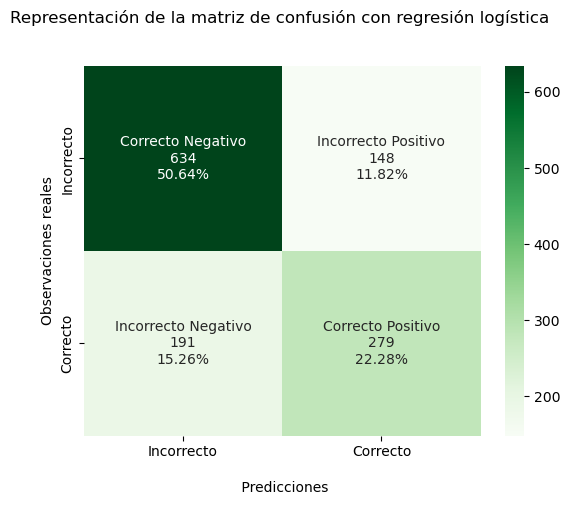

In [32]:
# Visualización de la matriz de confusión
import numpy as np

mat_conf_log = confusion_matrix(Y_prueba, Y_pred_log)

print('Matriz de confusión usando regresión logística:')
print(mat_conf_log)

# Representación gráfica
nombres_grupos = ['Correcto Negativo','Incorrecto Positivo','Incorrecto Negativo','Correcto Positivo']

conteos_grupos = ["{0:0.0f}".format(valor) for valor in
                mat_conf_log.flatten()]

porcentajes_grupos = ["{0:.2%}".format(valor) for valor in
                     mat_conf_log.flatten()/np.sum(mat_conf_log)]

etiquetas = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(nombres_grupos, conteos_grupos, porcentajes_grupos)]

etiquetas = np.asarray(etiquetas).reshape(2,2)

grafico = sns.heatmap(mat_conf_log, annot=etiquetas, fmt='', cmap='Greens')

grafico.set_title('Representación de la matriz de confusión con regresión logística \n\n');
grafico.set_xlabel('\n Predicciones')
grafico.set_ylabel('Observaciones reales');
grafico.xaxis.set_ticklabels(['Incorrecto','Correcto'])
grafico.yaxis.set_ticklabels(['Incorrecto','Correcto'])

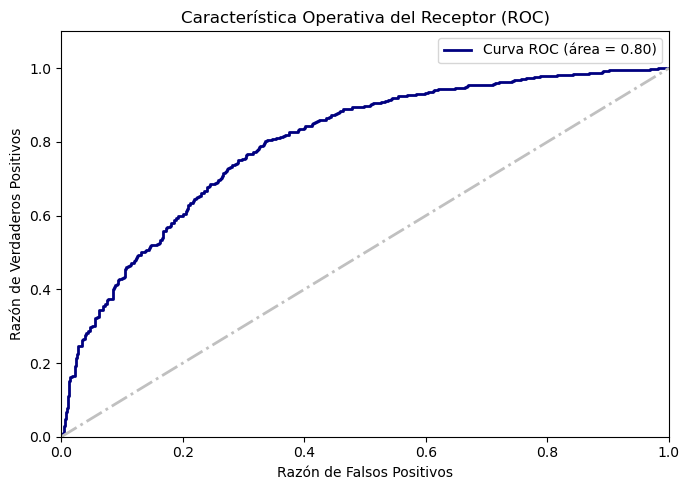

In [72]:
# Predicción de probabilidades

from sklearn.metrics import roc_curve, roc_auc_score

probs_logit = log_reg.predict_proba(X_prueba)[:, 1]

# Cálculo de FPR, TPR, y thresholds
fpr_log, tpr_log, _ = roc_curve(Y_prueba, probs_logit)

# Calcula el área bajo la curva ROC
auc_log = roc_auc_score(Y_prueba, probs_logit)

# Dibujo de la curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, color='navy', lw=2, label='Curva ROC (área = {:.2f})'.format(auc_log))
plt.plot([0, 1], [0, 1], color='silver', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('Razón de Falsos Positivos')
plt.ylabel('Razón de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [35]:
# Mostramos el valor AUC

valor_auc_log = roc_auc_score(Y_prueba, Y_pred_log)
print('\n \n El área bajo la curva (AUC) para el modelo Logit es: {:.3f} \n \n'.format(valor_auc_log))

# Determinamos la precisión (Accuracy):

precisión = accuracy_score(Y_prueba, Y_pred_log)
print('\n \n La precisión del modelo Logit resulta ser: {:.6f} \n \n'.format(precisión))


 
 El área bajo la curva (AUC) para el modelo Logit es: 0.702 
 


 
 La precisión del modelo Logit resulta ser: 0.729233 
 



In [41]:
#Analisis discriminante lineal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda = lda.fit(X_entrenamiento,Y_entrenamiento )

# Predecimos con el modelo de ADL sobre las X test
Y_pred_lda = lda.predict(X_prueba) 


Matriz de confusión usando LDA:
[[630 152]
 [181 289]]


[Text(0, 0.5, 'Incorrecto'), Text(0, 1.5, 'Correcto')]

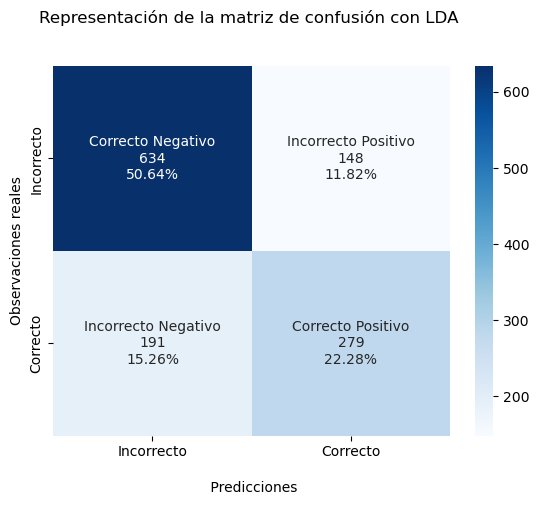

In [58]:
mat_conf_lda = confusion_matrix(Y_prueba, Y_pred_lda)

print('Matriz de confusión usando LDA:')
print(mat_conf_lda)

# Representación gráfica
nombres_grupos = ['Correcto Negativo','Incorrecto Positivo','Incorrecto Negativo','Correcto Positivo']

conteos_grupos = ["{0:0.0f}".format(valor) for valor in
                mat_conf_log.flatten()]

porcentajes_grupos = ["{0:.2%}".format(valor) for valor in
                     mat_conf_log.flatten()/np.sum(mat_conf_log)]

etiquetas = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(nombres_grupos, conteos_grupos, porcentajes_grupos)]

etiquetas = np.asarray(etiquetas).reshape(2,2)

grafico = sns.heatmap(mat_conf_log, annot=etiquetas, fmt='', cmap='Blues')

grafico.set_title('Representación de la matriz de confusión con LDA \n\n');
grafico.set_xlabel('\n Predicciones')
grafico.set_ylabel('Observaciones reales');
grafico.xaxis.set_ticklabels(['Incorrecto','Correcto'])
grafico.yaxis.set_ticklabels(['Incorrecto','Correcto'])

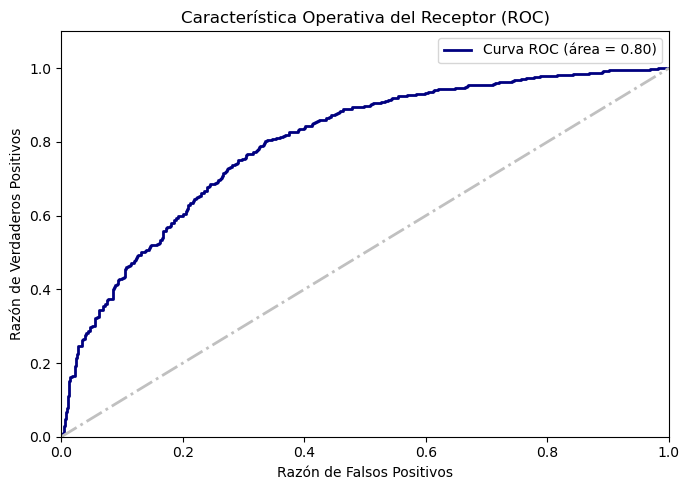

In [45]:
# Predicción de probabilidades
probs_lda = lda.predict_proba(X_prueba)[:, 1]

# Cálculo de FPR, TPR, y thresholds
fpr_lda, tpr_lda, _ = roc_curve(Y_prueba, probs_lda)

# Calcula el área bajo la curva ROC
roc_auc = roc_auc_score(Y_prueba, probs_lda)

# Dibujo de la curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, color='navy', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='silver', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('Razón de Falsos Positivos')
plt.ylabel('Razón de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [89]:
valor_auc_lda = roc_auc_score(Y_prueba, Y_pred_lda)
print('\n \n El área bajo la curva (AUC) para el modelo LDA es: {:.3f} \n \n'.format(valor_auc_log))

# Determinamos la precisión (Accuracy):

precisión = accuracy_score(Y_prueba, Y_pred_lda)
print('\n \n La precisión del modelo LDA resulta ser: {:.6f} \n \n'.format(precisión))


 
 El área bajo la curva (AUC) para el modelo LDA es: 0.702 
 


 
 La precisión del modelo LDA resulta ser: 0.734026 
 



In [57]:
#Modelo KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_entrenamiento, Y_entrenamiento)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred_knn = knn.predict(X_prueba.values)
                         

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

matriz_confusion_knn = confusion_matrix(Y_prueba, y_pred_knn)

print('Matriz de confusión:')
print(matriz_confusion_knn)



Matriz de confusión:
[[606 176]
 [202 268]]
Accuracy Score: 0.698


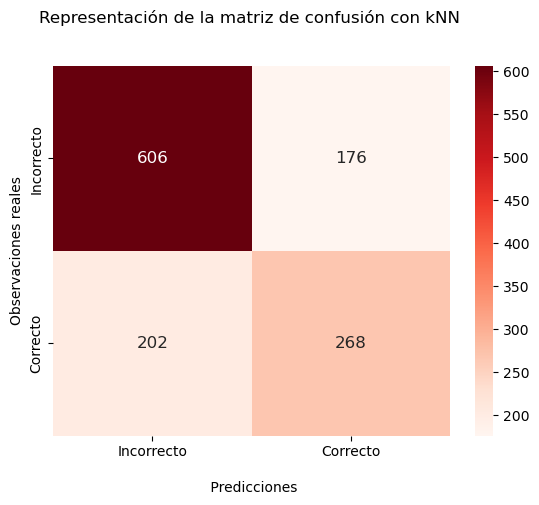

Accuracy Score: 0.698


In [92]:
# Crear el gráfico
mc_knn_plot = sns.heatmap(matriz_confusion_knn, annot=True, fmt='g', cmap='Reds', 
                          xticklabels=['Incorrecto', 'Correcto'], 
                          yticklabels=['Incorrecto', 'Correcto'], 
                          annot_kws={"fontsize": 12})

# Añadir título y etiquetas
mc_knn_plot.set_title('Representación de la matriz de confusión con kNN \n\n');
mc_knn_plot.set_xlabel('\n Predicciones')
mc_knn_plot.set_ylabel('Observaciones reales');

# Mostrar el gráfico
plt.show()
plt.close()

ac_knn = accuracy_score(Y_prueba, y_pred_knn)
print(f'Accuracy Score: {ac_knn:.3f}')


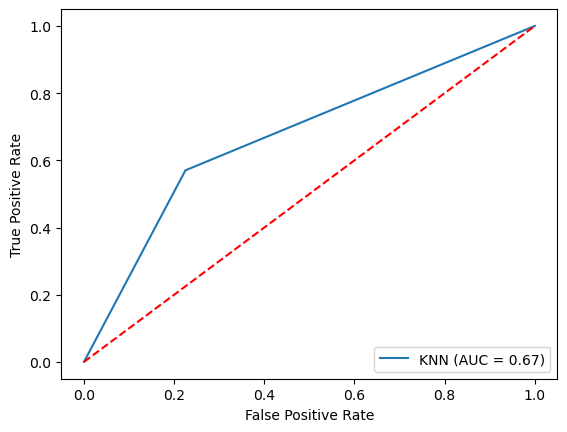


 AUC KNN: 0.67 



In [65]:
from sklearn.metrics import RocCurveDisplay


fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_prueba, y_pred_knn)

display = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=auc_knn, estimator_name='KNN')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

auc_knn = roc_auc_score(Y_prueba, y_pred_knn)
print('\n','AUC KNN:', '%.2f' % auc_knn,'\n')

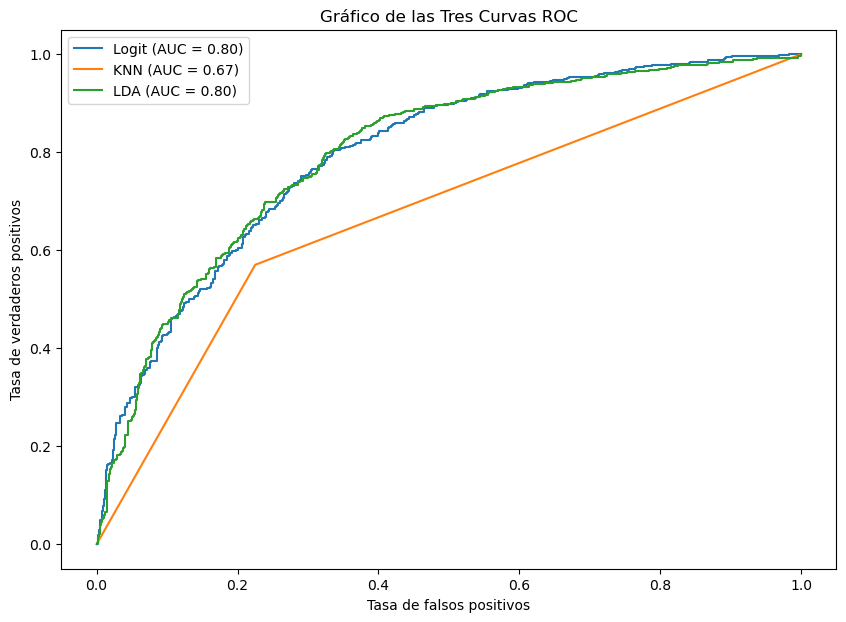

In [93]:
#4
# Graficamos las tres curvas ROC juntas
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f'Logit (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = 0.67)')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {roc_auc:.2f})')

# Agregar etiquetas y leyenda
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Gráfico de las Tres Curvas ROC')
plt.legend()

# Mostrar el gráfico
#plt.savefig('../outputs/roc_curves.png', format='png')
plt.show()
plt.close()


In [103]:
# Reentrenar el modelo sin la columna 'pobre'
if 'pobre' in X_entrenamiento.columns:
    X_entrenamiento = X_entrenamiento.drop(columns=['pobre'])

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_entrenamiento, Y_entrenamiento)

# Preparar el conjunto de datos no_respondieron
X_no_respondieron = clean_no_respondieron.select_dtypes(include=["number"])

# Asegurarse de que X_no_respondieron no contenga las columnas pred_label_pobre y pred_prob_pobre
if 'pred_label_pobre' in X_no_respondieron.columns:
    X_no_respondieron = X_no_respondieron.drop(columns=['pred_label_pobre'])

if 'pred_prob_pobre' in X_no_respondieron.columns:
    X_no_respondieron = X_no_respondieron.drop(columns=['pred_prob_pobre'])

# Añadir la columna constante
X_no_respondieron["constante"] = 1

# Proceder a realizar la predicción:
probs_no_respondieron = log_reg.predict_proba(X_no_respondieron)[:, 1]
labels_no_respondieron = log_reg.predict(X_no_respondieron)

# Guardar las predicciones en el DataFrame clean_no_respondieron
clean_no_respondieron["pred_prob_pobre"] = probs_no_respondieron
clean_no_respondieron["pred_label_pobre"] = labels_no_respondieron

proporcion_pobres = clean_no_respondieron["pred_label_pobre"].mean()

print(f"La proporción de las personas que no respondieron y que fueron identificadas como pobres es: {proporcion_pobres:.2%}")


La proporción de las personas que no respondieron y que fueron identificadas como pobres es: 39.76%
